# Running Your First Models

A Jupyter notebook in the `Python/` demonstrates how to use the Python UCLCHEM module. This page was automatically generated from that notebook.

In this example, we'll run three UCLCHEM models using the cloud model and the python wrapper. We'll also use the python module to plot the results.

Note, we ran this from the `Python/` directory meaning `Python/uclchem/` was in our PATH. You can run scripts elsewhere but `Python/uclchem/` must either be copied to that location or added to your PYTHON_PATH environmental variable.

In [1]:
import uclchem
import pandas as pd
import matplotlib.pyplot as plt

# Phase 1

It's typical when running UCLCHEM to run the model in two phases. If, for example, one wishes to model a hot core, the gas should be well processed by the time the protostar "turns on". This could be achieved by initializing the abundances to some known values for a prestellar core but instead we do the following:

- Run a model starting from some very diffuse, atomic gas
- Allow it to collapse in freefall to the density of the object we wish to model
- Store the abundances as the initial abundances for the hot core model

UCLCHEM is set up to do this through the ```phase``` parameter. All physics modules will model a homogenous cloud that can collapse under freefall when ```phase=1``` and then they do their specific physical model when ```phase=2```

In [2]:
#set a parameter dictionary for phase 1 collapse model

outSpecies="SO CO"
param_dict = {"phase": 1, "switch": 1, "collapse": 1, "writeStep": 1,
               "outSpecies": outSpecies, "initialDens": 1e2, "initialTemp":10.0,
               "finalDens":1e5, "finalTime":5.0e6,
               "outputFile":"../examples/test-output/phase1-full.dat",
               "abundSaveFile":"../examples/test-output/startcollapse.dat"}
uclchem.run_model(param_dict)


0

We can look at the output for that model by using pandas to read the file (skipping 2 rows to miss the header) and matplotlib to view abundances.

In [3]:
phase1_df=uclchem.read_output_file("../examples/test-output/phase1-full.dat")
phase1_df.head()

,Time,Density,gasTemp,av,point,H,#H,H+,H2,#H2,...,HS2+,HSO2+,H2S2+,H2S2,#H2S2,BULK,SURFACE,E-,zeta,radfield
0,0.000000e+00,100.1,10.0,2.0096,1,0.5,0.000000e+00,0.000000e+00,0.25,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000182,1.0,1.0
1,1.000000e-07,100.1,10.0,2.0097,1,0.5,5.960590e-15,1.789030e-17,0.25,1.000000e-30,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,5.972770e-15,0.000182,1.0,1.0
2,1.000000e-06,100.1,10.0,2.0097,1,0.5,5.882050e-14,1.789030e-16,0.25,1.624480e-26,...,1.088530e-30,1.000000e-30,1.000000e-30,1.037370e-30,1.000000e-30,1.000000e-30,5.894070e-14,0.000182,1.0,1.0
3,1.000000e-05,100.1,10.0,2.0097,1,0.5,5.874180e-13,1.789040e-15,0.25,2.733060e-23,...,1.171170e-29,1.000000e-30,1.000000e-30,1.070430e-30,1.000000e-30,1.000000e-30,5.886180e-13,0.000182,1.0,1.0
4,1.000000e-04,100.1,10.0,2.0097,1,0.5,5.871590e-12,1.789080e-14,0.25,2.535310e-20,...,1.091760e-27,1.000000e-30,1.000000e-30,1.103670e-30,1.000000e-30,1.000000e-30,5.883600e-12,0.000182,1.0,1.0


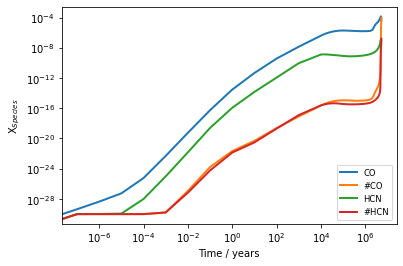

In [4]:
species=["CO","#CO","HCN","#HCN"]
fig,ax=uclchem.create_abundance_plot(phase1_df,species)
ax=ax.set(xscale="log")

# Phase 2

Phase 2 is essentially turning on whatever physics the module is supposed to model. We do this by setting the `phase` parameter to 2.

We also want to continue where we left off with phase 1, we do this by using `abundLoadFile` to tell UCLCHEM where to load the initial abundances from. We set this to the file that we designated as `abundSaveFile` in phase 1. Since we don't want to run a third model continuing from this one, we remove abundSaveFile from this dictionary with `pop`

In [5]:
#read old abundances and do hot core behaviour
param_dict["phase"]=2

#change other bits of input to set up phase 2
param_dict["initialDens"]=1e5
param_dict["tempindx"]=3 #selects mass of protostar (see cloud.f90)
param_dict["finalTime"]=1e6
param_dict["switch"]=0

param_dict.pop("abundSaveFile") #this is still set to startcollapse.dat from phase 1 so remove it or change it.
param_dict["abundLoadFile"]="../examples/test-output/startcollapse.dat"
param_dict["outputFile"]="../examples/test-output/phase1-full.dat"


uclchem.run_model(param_dict)

0

In [6]:
phase2_df=uclchem.read_output_file("../examples/test-output/phase2-full.dat")
phase2_df.tail()

,Time,Density,gasTemp,av,point,H,#H,H+,H2,#H2,...,HS2+,HSO2+,H2S2+,H2S2,#H2S2,BULK,SURFACE,E-,zeta,radfield
189,960400.0,100100.0,303.83,11.653,1,0.000031,1.000000e-30,3.377720e-12,0.499922,1.000000e-30,...,3.402050e-17,1.285460e-12,5.164740e-15,3.421920e-12,1.000000e-30,1.000000e-30,0.000039,1.669970e-07,1.0,1.0
190,970400.0,100100.0,303.83,11.653,1,0.000031,1.000000e-30,3.368300e-12,0.499921,1.000000e-30,...,3.288930e-17,1.276790e-12,4.991920e-15,3.388420e-12,1.000000e-30,1.000000e-30,0.000039,1.667910e-07,1.0,1.0
191,980400.0,100100.0,303.83,11.653,1,0.000031,1.000000e-30,3.358990e-12,0.499921,1.000000e-30,...,3.180000e-17,1.268230e-12,4.824770e-15,3.355250e-12,1.000000e-30,1.000000e-30,0.000039,1.665830e-07,1.0,1.0
192,990400.0,100100.0,303.83,11.653,1,0.000031,1.000000e-30,3.349800e-12,0.499920,1.000000e-30,...,3.075070e-17,1.259790e-12,4.663100e-15,3.322420e-12,1.000000e-30,1.000000e-30,0.000039,1.663760e-07,1.0,1.0
193,1000000.0,100100.0,303.83,11.653,1,0.000031,1.000000e-30,3.340720e-12,0.499920,1.000000e-30,...,2.974010e-17,1.251470e-12,4.506720e-15,3.289900e-12,1.000000e-30,1.000000e-30,0.000039,1.661680e-07,1.0,1.0


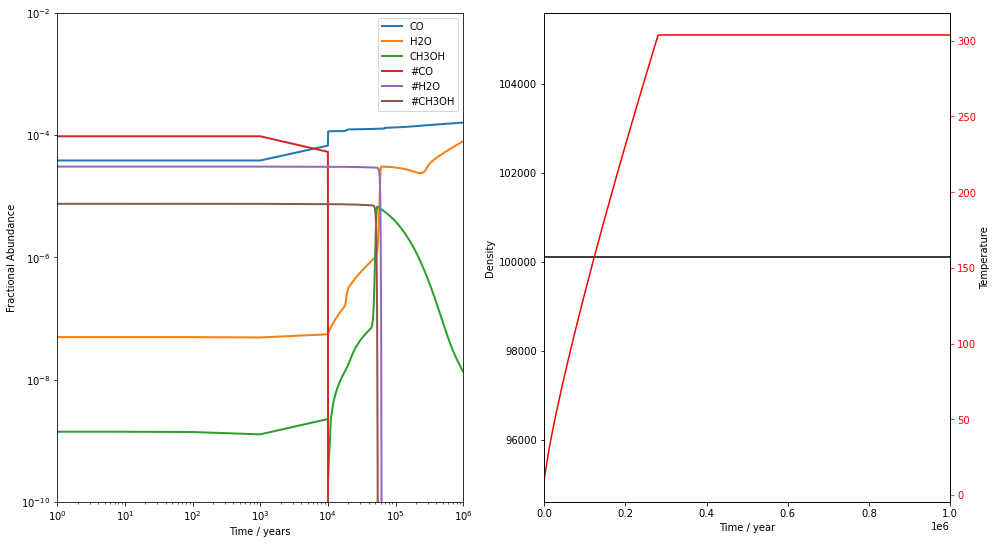

In [12]:
species=["CO","H2O","CH3OH","#CO","#H2O","#CH3OH"]

fig,[ax,ax2]=plt.subplots(1,2,figsize=(16,9))
ax=uclchem.plot_species(ax,phase2_df,species)
settings=ax.set(yscale="log",xlim=(1,1e6),ylim=(1e-10,1e-2),
            xlabel="Time / years", 
            ylabel="Fractional Abundance",xscale="log")

ax2.plot(phase2_df["Time"],phase2_df["Density"],color="black")
ax3=ax2.twinx()
ax3.plot(phase2_df["Time"],phase2_df["gasTemp"],color="red")
ax2.set(xlabel="Time / year",ylabel="Density")
ax3.set(ylabel="Temperature",facecolor="red",xlim=(0,1e6))
ax3.tick_params(axis='y', colors='red')